In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict.csv')

**This notebook gives an idea about how Keras works with Regression Problems**

In [3]:
df.shape

(400, 9)

In [4]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
331,332,311,105,2,3.0,2.0,8.12,1,0.73
183,184,314,110,3,4.0,4.0,8.80,0,0.75
89,90,316,109,4,4.5,3.5,8.76,1,0.74


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

In [14]:
model.add(Dense(7,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [17]:
history = model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/100
29/29 [==============================] - 0s 6ms/step - loss: 0.2102 - val_loss: 0.1964
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1470 - val_loss: 0.1506
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1080 - val_loss: 0.1268
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0816 - val_loss: 0.1030
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0640 - val_loss: 0.0927
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0803
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0707
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0368 - val_loss: 0.0626
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0578
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0278 - val_loss: 0.0512
Epoch 11/

In [18]:
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5605922102387706

Model evaluation and improvements

1. increase epochs
2. Add more layers
3. increase the no. of nodes in the hidden layer

In [20]:
history.history



{'loss': [0.21016034483909607,
  0.14695030450820923,
  0.10795922577381134,
  0.08157627284526825,
  0.06404004991054535,
  0.05207158625125885,
  0.04330209642648697,
  0.0367656871676445,
  0.03185306116938591,
  0.02777102217078209,
  0.024594705551862717,
  0.022235356271266937,
  0.02011527679860592,
  0.01848413050174713,
  0.017101582139730453,
  0.01582888513803482,
  0.014870895072817802,
  0.013944165781140327,
  0.013177912682294846,
  0.01257702149450779,
  0.011904817074537277,
  0.01132213044911623,
  0.010868418961763382,
  0.010389885865151882,
  0.010061491280794144,
  0.009591782465577126,
  0.009278527460992336,
  0.008931552991271019,
  0.008744560182094574,
  0.008365217596292496,
  0.008144382387399673,
  0.00792013481259346,
  0.00762537308037281,
  0.007422134280204773,
  0.0071706026792526245,
  0.006987639702856541,
  0.006939557380974293,
  0.006871519610285759,
  0.006576139945536852,
  0.00653334753587842,
  0.006248367950320244,
  0.006155245006084442,
  

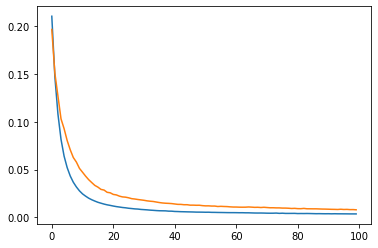

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

**CONCLUSION**

* Clearly visible overfitted on training data. And the more layers we need the more it will overfit.
* More the no. of nodes, less epochs is needed and the model will stabelise faster.
* Also, more the no. of layers, less epochs will be needed.